#### In this notebook, we demonstrate how to use the DLN code to train, evaluate, and visualize models.

In [1]:
# cd to the parent directory
import os
os.chdir("..")

#### Training

#### Let's use the dataset we prepared in the prepare_dataset notebook. We present a general use case here. For more advanced functions such as pruning, freezing, and the unified phase, see the descriptions in `experiments/main.py`.

In [2]:
!python experiments/main.py \
--train_model True \
--dataset Heart \
--seed 0 \
--num_epochs 1000 \
--batch_size 64 \
--learning_rate 0.2 \
--tau_out 3 \
--grad_factor 1.2 \
--first_hl_size 50 \
--last_hl_size_wrt_first 0.25 \
--num_hidden_layers 4 \
--discretize_strategy tree \
--continuous_resolution 4 \
--concat_input True \
--save_model

# last_hidden_layer_size = first_hidden_layer_size x last_hl_size_wrt_first
# The middle hidden layers will have sizes in a geometric progression from the first to the last layer
# Will save the model with the best mean train + val balanced-class accuracy

----------
depth: 6; num layers: 9
idx: 0; layer: ThresholdLayer(34, 34), depth: 1, next_layer_idx: 1
idx: 1; layer: LogicLayer(34, 50), depth: 2, next_layer_idx: 2
idx: 2; layer: LogicLayer(84, 31), depth: 3, next_layer_idx: 3
idx: 3; layer: LogicLayer(65, 19), depth: 4, next_layer_idx: 4
idx: 4; layer: LogicLayer(53, 12), depth: 5, next_layer_idx: 5
idx: 5; layer: SumLayer(12, 2), depth: 6, next_layer_idx: None
idx: 6; layer: ThresholdLayer(34, 34), depth: 2, next_layer_idx: 2
idx: 7; layer: ThresholdLayer(34, 34), depth: 3, next_layer_idx: 3
idx: 8; layer: ThresholdLayer(34, 34), depth: 4, next_layer_idx: 4
----------


#### Evaluation

#### We can use the ```--evaluate_model``` flag, which loads the model and evaluates its balanced-class accuracy. It then attempts to simplify the model using SymPy before evaluating the model’s high-level OPs, basic gate-level OPs, number of parameters, and disk space usage. If simplification is successful, the simplified model is used for these evaluations.

In [3]:
!python experiments/main.py \
--train_model False \
--evaluate_model True \
--dataset Heart \
--seed 0

----------
depth: 6; num layers: 9
idx: 0; layer: ThresholdLayer(34, 34), depth: 1, next_layer_idx: 1
idx: 1; layer: LogicLayer(34, 50), depth: 2, next_layer_idx: 2
idx: 2; layer: LogicLayer(84, 31), depth: 3, next_layer_idx: 3
idx: 3; layer: LogicLayer(65, 19), depth: 4, next_layer_idx: 4
idx: 4; layer: LogicLayer(53, 12), depth: 5, next_layer_idx: 5
idx: 5; layer: SumLayer(12, 2), depth: 6, next_layer_idx: None
idx: 6; layer: ThresholdLayer(34, 34), depth: 2, next_layer_idx: 2
idx: 7; layer: ThresholdLayer(34, 34), depth: 3, next_layer_idx: 3
idx: 8; layer: ThresholdLayer(34, 34), depth: 4, next_layer_idx: 4
----------


In [4]:
# Read the eval results

import json
from experiments.utils import *

results_path = get_results_path(dataset='Heart', seed=0)
with open(f"{results_path}/eval_results.json", 'r') as f:
    data = json.load(f)
print(json.dumps(data, indent=4))

{
    "dataset": "Heart",
    "seed": 0,
    "acc_testLoader_train_mode": 0.8198529411764706,
    "acc_testLoader_eval_mode": 0.8198529411764706,
    "num_hl_ops": 52,
    "num_bg_ops": 608,
    "num_params": 121,
    "num_disk_bits": 1936,
    "num_neurons": 39,
    "simplified": true
}


#### Visualization

#### We use Graphviz to render DLNs generated from SymPy code.

In [5]:
!python experiments/DLN_viz.py \
results/Heart/seed_0/sympy_code.py \
quickstart/example/viz

# A file named viz.png will be created

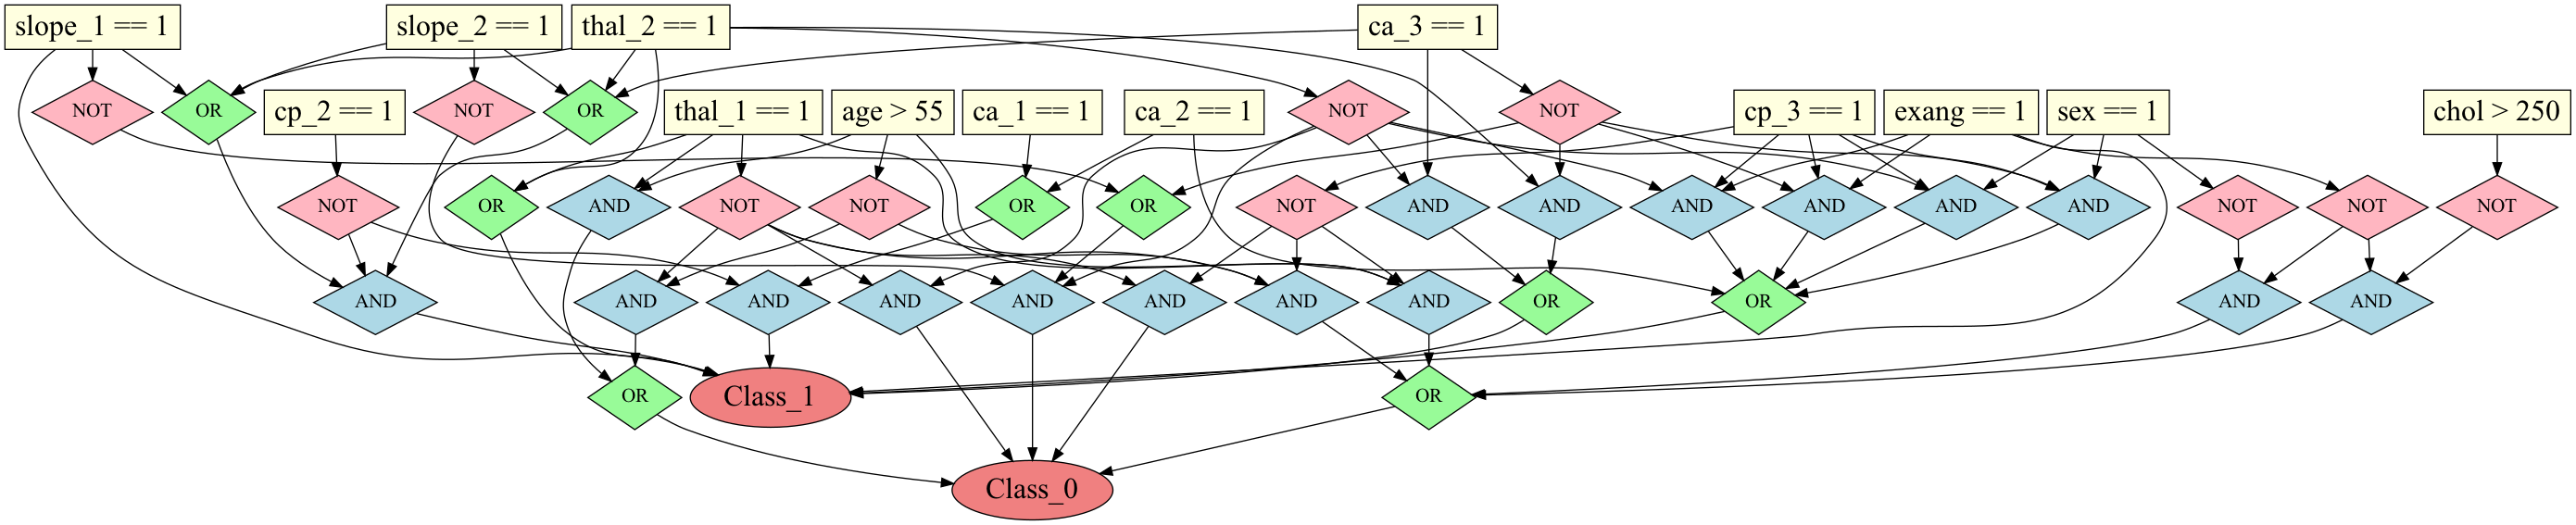

In [6]:
from IPython.display import Image

Image("quickstart/example/viz.png")

#### The Heart dataset has 5 continuous and 14 categorical features. The DLN uses only 2 continuous and 11 categorical features.